In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [3]:
file_path = '../data/charging_sessions_cleaned.csv'
data = pd.read_csv(file_path)

print(data.head())
# Auswahl der relevanten Merkmale
features = data[['kWhDelivered', 'duration', 'chargingPower']].copy()

# Normalisierung der Daten
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

   Unnamed: 0                        id             connectionTime  \
0           0  5e23b149f9af8b5fe4b973cf  2020-01-02 13:08:54+00:00   
1           1  5e23b149f9af8b5fe4b973d0  2020-01-02 13:36:50+00:00   
2           2  5e23b149f9af8b5fe4b973d1  2020-01-02 13:56:35+00:00   
3           3  5e23b149f9af8b5fe4b973d2  2020-01-02 13:59:58+00:00   
4           4  5e23b149f9af8b5fe4b973d3  2020-01-02 14:00:01+00:00   

              disconnectTime           doneChargingTime  kWhDelivered  \
0  2020-01-02 19:11:15+00:00  2020-01-02 17:31:35+00:00        25.016   
1  2020-01-02 22:38:21+00:00  2020-01-02 20:18:05+00:00        33.097   
2  2020-01-03 00:39:22+00:00  2020-01-02 16:35:06+00:00         6.521   
3  2020-01-02 16:38:39+00:00  2020-01-02 15:18:45+00:00         2.355   
4  2020-01-02 22:08:40+00:00  2020-01-02 18:17:30+00:00        13.375   

                                sessionID  siteID    stationID  \
0  1_1_179_810_2020-01-02 13:08:53.870034       1  1-1-179-810   
1  1_1_1

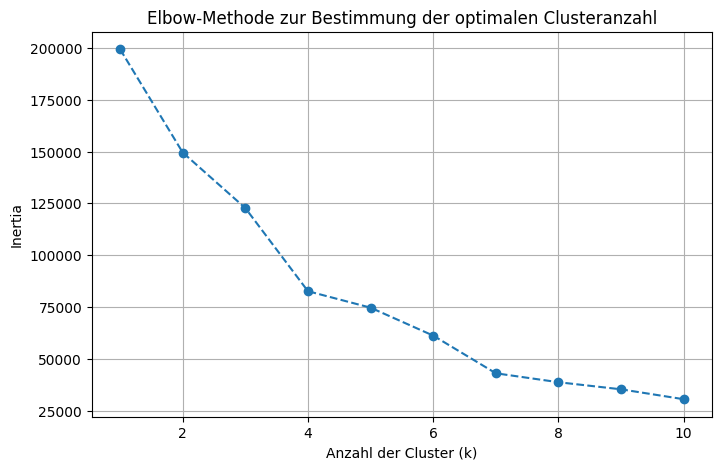

In [4]:
# Bestimmung der optimalen Anzahl an Clustern mit der Elbow-Methode
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Elbow-Plot erstellen
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusteranzahl')
plt.xlabel('Anzahl der Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()